 # Power Load Prediction for West Zone - EDA v3
 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_75024/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [3]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [5]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [6]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [7]:
power_data_west['month'] = power_data_west['End Date Time'].dt.strftime('%b')

KeyError: 'End Date Time'

In [ ]:
power_data_west['day_of_week'] = power_data_west['End Date Time'].dt.day_name()

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['End Date Time'].dt.date.astype('datetime64').isin(holidays)

In [8]:
power_data_west.head(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
5,5,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
6,6,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
7,7,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
8,8,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,2019-01-29 02,682,1548756000,2019-01-29 10,22,62.98,2019-01-29 02
9,9,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,2019-01-29 02,682,1548756000,2019-01-29 10,22,62.98,2019-01-29 02


In [9]:
power_data_west.tail(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
104598,104598,104598,west,2022-01-25 13:30:00,2022-01-25 13:45:00,301.6,NaN,66.0,NaN,1206.4,2022-01-25 13,26901,1643144400,2022-01-25 21,37,68.23,2022-01-25 13
104599,104599,104599,west,2022-01-25 13:45:00,2022-01-25 14:00:00,300.0,NaN,66.0,NaN,1200.0,2022-01-25 13,26901,1643144400,2022-01-25 21,37,68.23,2022-01-25 13
104600,104600,104600,west,2022-01-25 14:00:00,2022-01-25 14:15:00,300.8,NaN,67.0,NaN,1203.2,2022-01-25 14,26902,1643148000,2022-01-25 22,27,69.22,2022-01-25 14
104601,104601,104601,west,2022-01-25 14:15:00,2022-01-25 14:30:00,309.6,NaN,67.0,NaN,1238.4,2022-01-25 14,26902,1643148000,2022-01-25 22,27,69.22,2022-01-25 14
104602,104602,104602,west,2022-01-25 14:30:00,2022-01-25 14:45:00,297.6,NaN,67.0,NaN,1190.4,2022-01-25 14,26902,1643148000,2022-01-25 22,27,69.22,2022-01-25 14
104603,104603,104603,west,2022-01-25 14:45:00,2022-01-25 15:00:00,297.6,NaN,67.0,NaN,1190.4,2022-01-25 14,26902,1643148000,2022-01-25 22,27,69.22,2022-01-25 14
104604,104604,104604,west,2022-01-25 15:00:00,2022-01-25 15:15:00,295.2,NaN,67.0,NaN,1180.8,2022-01-25 15,26903,1643151600,2022-01-25 23,26,68.34,2022-01-25 15
104605,104605,104605,west,2022-01-25 15:15:00,2022-01-25 15:30:00,304.8,NaN,67.0,NaN,1219.2,2022-01-25 15,26903,1643151600,2022-01-25 23,26,68.34,2022-01-25 15
104606,104606,104606,west,2022-01-25 15:30:00,2022-01-25 15:45:00,309.6,NaN,67.0,NaN,1238.4,2022-01-25 15,26903,1643151600,2022-01-25 23,26,68.34,2022-01-25 15
104607,104607,104607,west,2022-01-25 15:45:00,2022-01-25 16:00:00,296.8,NaN,67.0,NaN,1187.2,2022-01-25 15,26903,1643151600,2022-01-25 23,26,68.34,2022-01-25 15


In [13]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [14]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [15]:
power_data_west['day_of_week'] = power_data_west['end'].dt.day_name()

In [16]:
power_data_west['day_of_week_int'] = power_data_west['end'].dt.day_of_week

In [19]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['end'].dt.date.astype('datetime64').isin(holidays)

In [20]:
power_data_west["holiday_int"] = power_data_west["holiday"].astype(int)

In [22]:
power_data_west_copy =  pd.DataFrame(power_data_west, columns=['demand', 'temp', 'end', 'humidity', 'month_int', 'day_of_week_int', 'holiday_int'])

In [23]:
power_data_west_copy.describe()

,demand,temp,humidity,month_int,day_of_week_int,holiday_int
count,104596.000000,104588.00000,104608.000000,104608.00000,104608.000000,104608.000000
mean,1238.634456,67.39232,52.635401,6.54298,2.998748,0.028449
std,302.399419,16.59371,22.815913,3.43464,2.002753,0.166253
min,0.000000,29.00000,3.000000,1.00000,0.000000,0.000000
25%,1008.000000,54.00000,34.000000,4.00000,1.000000,0.000000
50%,1232.000000,66.00000,49.000000,7.00000,3.000000,0.000000
75%,1472.000000,79.00000,70.000000,10.00000,5.000000,0.000000
max,2124.800000,114.00000,100.000000,12.00000,6.000000,1.000000


In [24]:
power_data_west_copy.replace(0, np.nan, inplace=True)

In [25]:
#For checking missing values in dataset
power_data_west_copy.isna().sum()

demand                 62
temp                   20
end                     0
humidity                0
month_int               0
day_of_week_int     14976
holiday_int        101632
dtype: int64

In [28]:
power_data_west_copy.fillna(method='ffill',inplace=True)
power_data_west_copy.isna().sum()

demand                0
temp                  0
end                   0
humidity              0
month_int             0
day_of_week_int       0
holiday_int        1919
dtype: int64

In [30]:
zero_usage_df = power_data_west_copy.loc[power_data_west_copy['demand'] == 0]
zero_usage_df.count()

demand             0
temp               0
end                0
humidity           0
month_int          0
day_of_week_int    0
holiday_int        0
dtype: int64

In [13]:
power_data_west.shape

(104736, 15)

In [11]:
power_data_west.dtypes

Unnamed: 0                int64
index_x                   int64
service                  object
start                    object
end              datetime64[ns]
usage                   float64
cost                    float64
temp                    float64
event_flag               object
demand                  float64
sfm                      object
index_y                   int64
dt                        int64
dt_iso                   object
humidity                  int64
humidity_temp           float64
pt_date                  object
dtype: object

In [12]:
#For checking missing values in dataset
power_data_west.isna().sum()

Unnamed: 0            0
index_x               0
service               0
start                 0
end                   0
usage                12
cost             104608
temp                 20
event_flag       104602
demand               12
sfm                   0
index_y               0
dt                    0
dt_iso                0
humidity              0
humidity_temp         0
pt_date               0
dtype: int64

dataset.kW.plot()

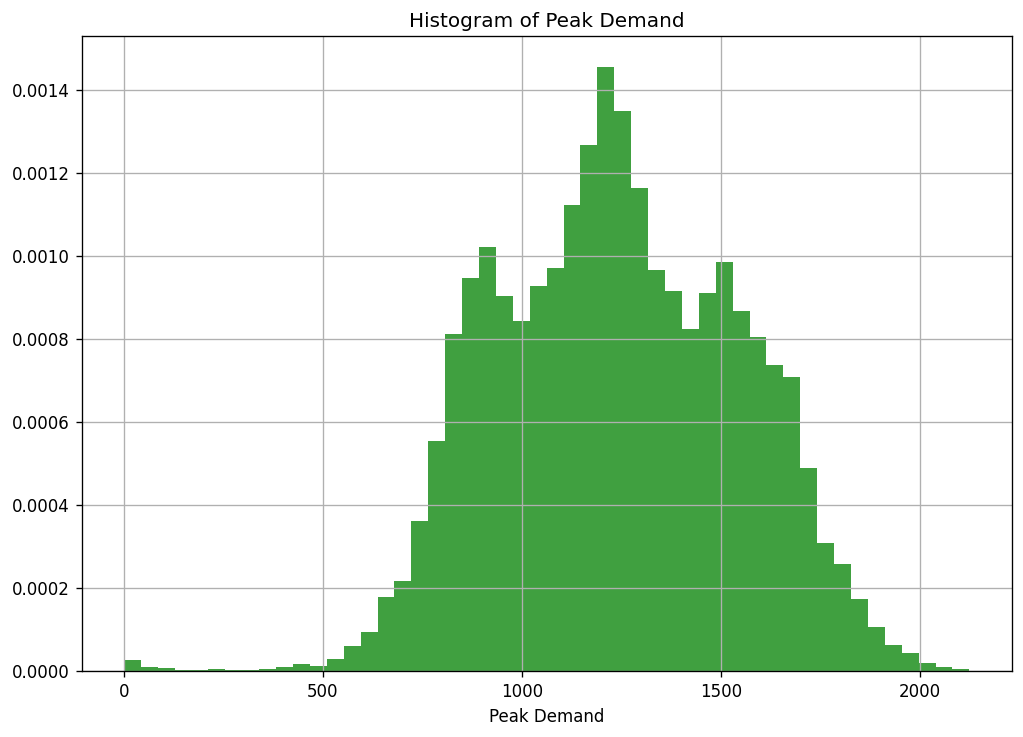

In [47]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_copy['demand'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Peak Demand')
plt.title('Histogram of Peak Demand')
plt.grid(True)
plt.show()

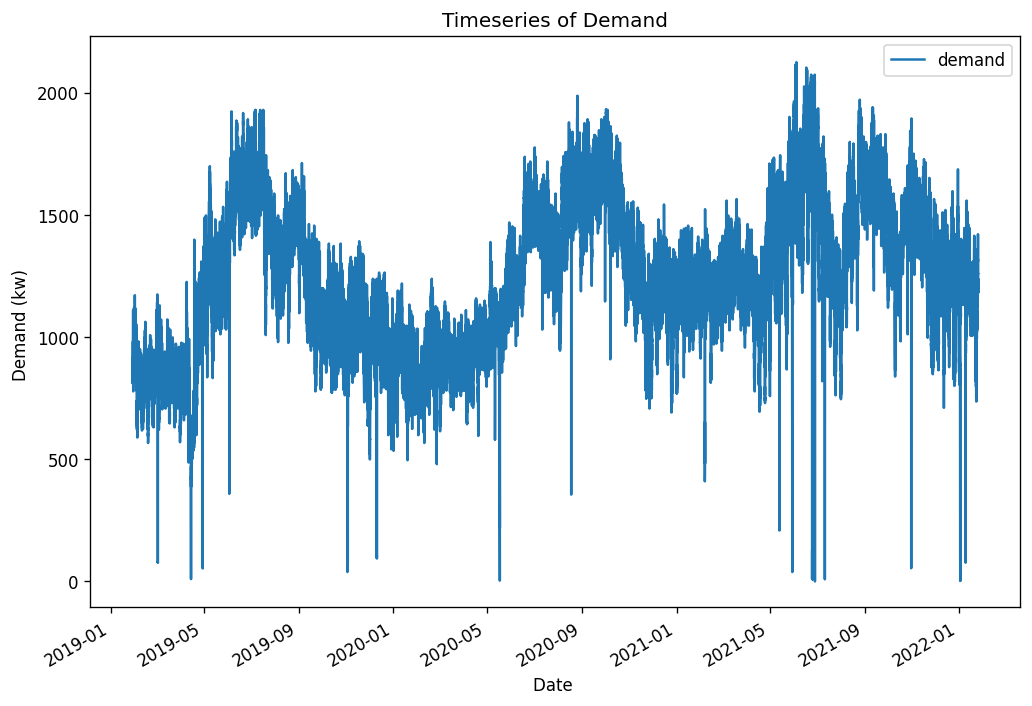

In [48]:
power_data_west_copy.plot(x='end', y='demand', kind='line') 
plt.xlabel('Date ')
plt.ylabel('Demand (kw) ')
plt.title('Timeseries of Demand')
plt.show()

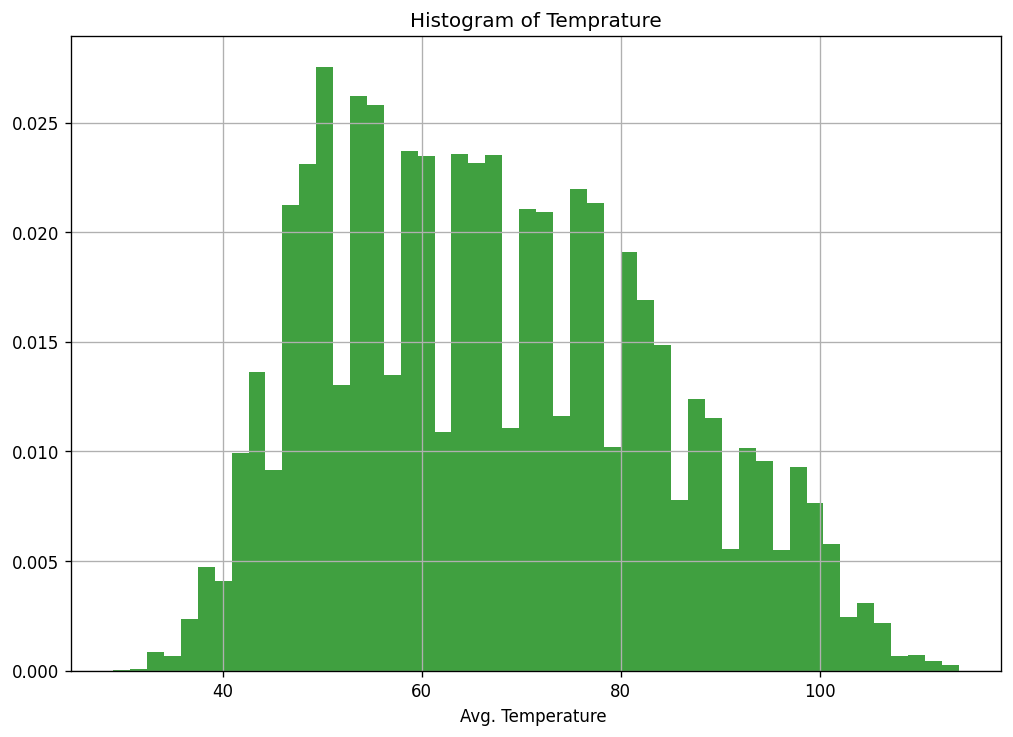

In [33]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_copy['temp'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Avg. Temperature ')
plt.title('Histogram of Temprature')
plt.grid(True)
plt.show()

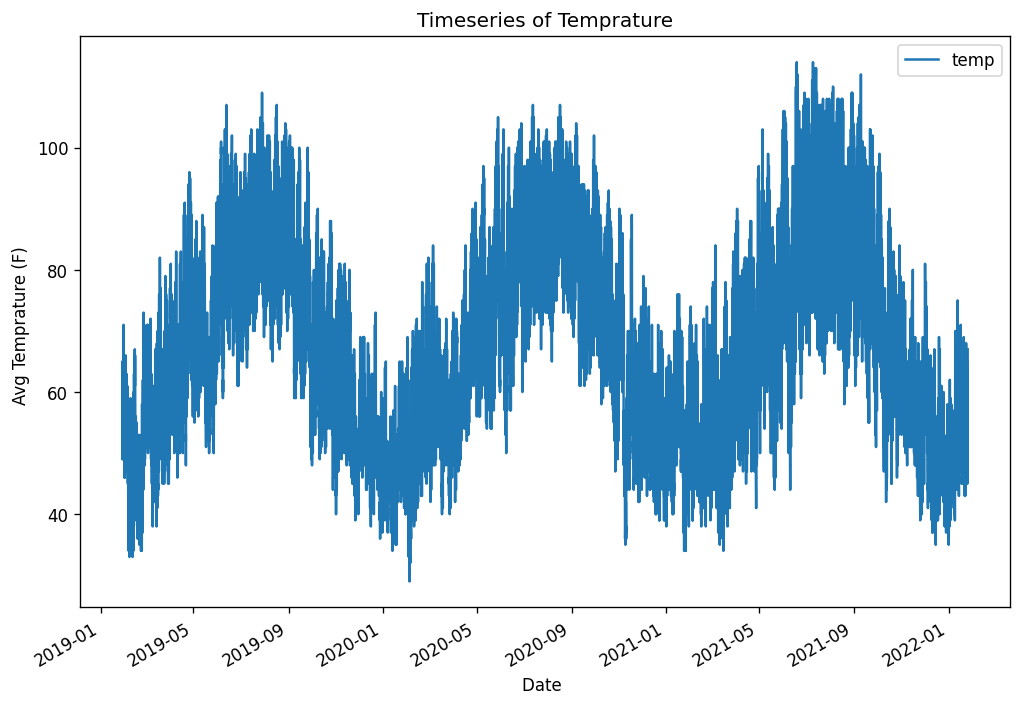

In [49]:
power_data_west_copy.plot(x='end', y='temp', kind='line') 
plt.xlabel('Date ')
plt.ylabel('Avg Temprature (F) ')
plt.title('Timeseries of Temprature')
plt.show()

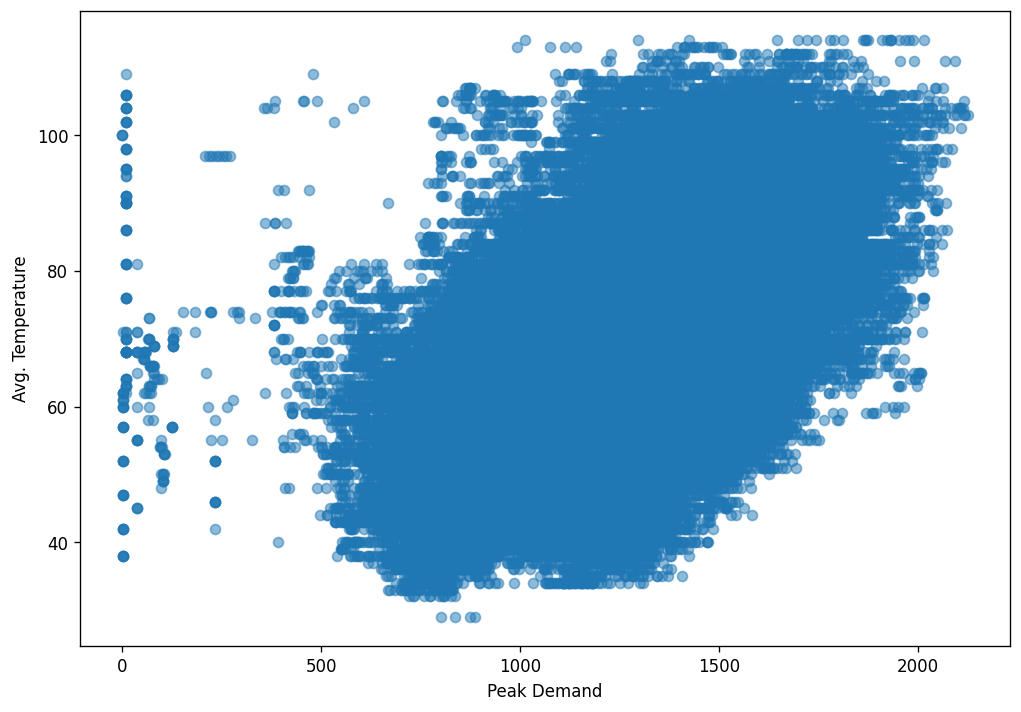

In [35]:
plt.scatter(power_data_west_copy['demand'], power_data_west_copy['temp'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Avg. Temperature")
plt.show()

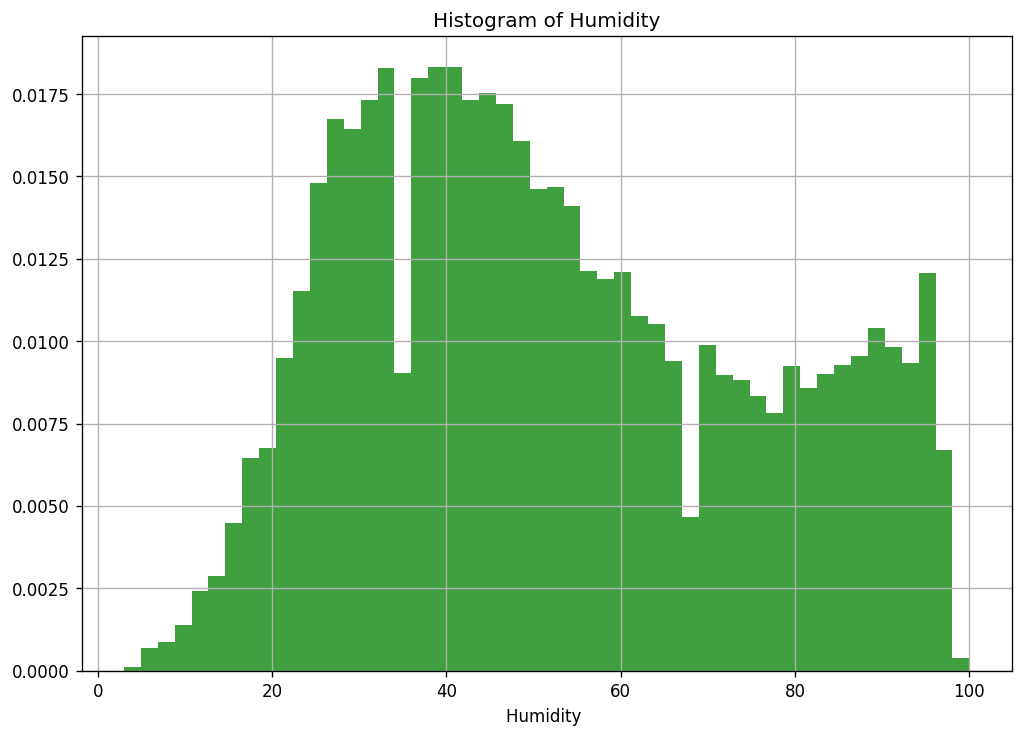

In [51]:
n, bins, patches = plt.hist(power_data_west_copy['humidity'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Humidity ')
plt.title('Histogram of Humidity')
plt.grid(True)
plt.show()

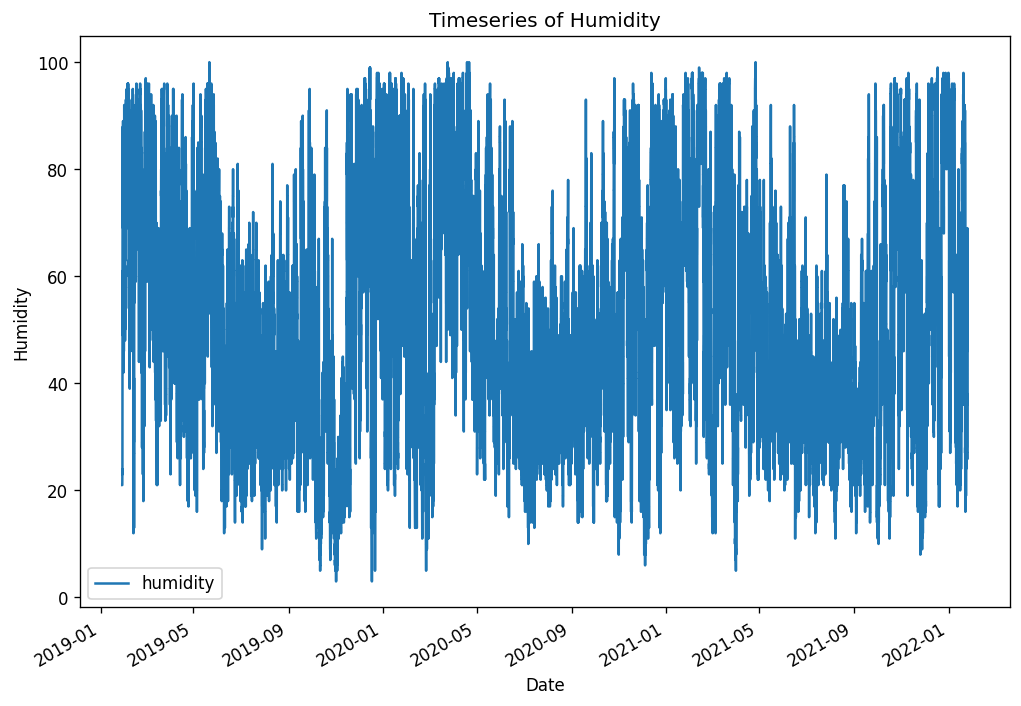

In [50]:
power_data_west_copy.plot(x='end', y='humidity', kind='line') 
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.title('Timeseries of Humidity')
plt.show()

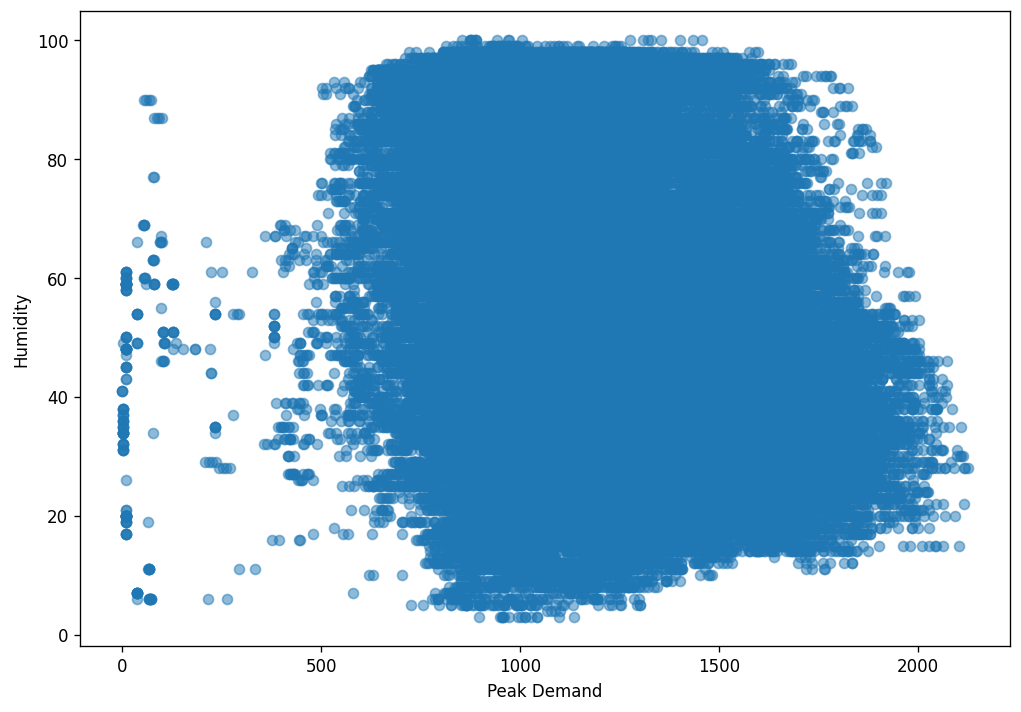

In [37]:
plt.scatter(power_data_west_copy['demand'], power_data_west_copy['humidity'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Humidity")
plt.show()

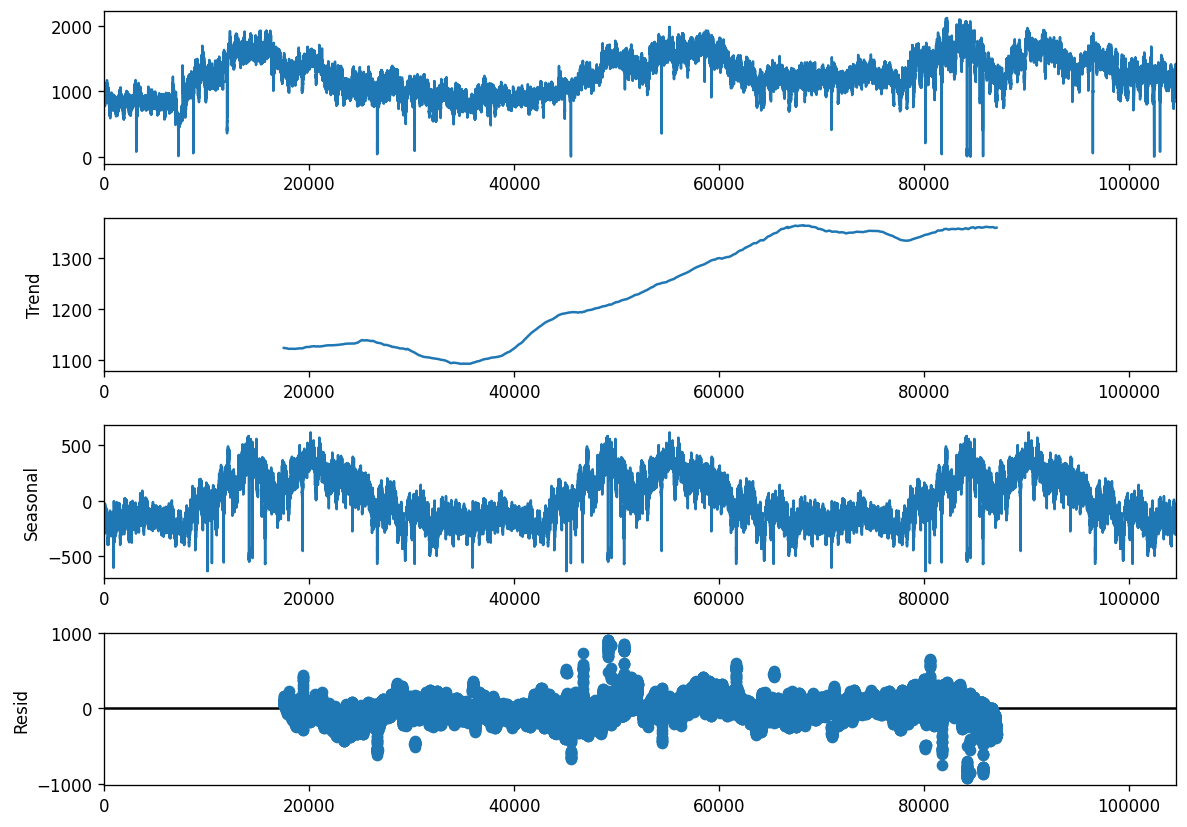

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.DataFrame(power_data_west_copy, columns=['demand'])
result = seasonal_decompose(series, model='additive', period=35040)
result.plot()
plt.show()

In [41]:
#Number of time_stamp per month
power_data_west_copy['end'].dt.month.value_counts()

3     8928
5     8928
7     8928
8     8928
10    8928
12    8832
4     8640
6     8640
9     8640
11    8640
1     8512
2     8064
Name: end, dtype: int64

<AxesSubplot:>

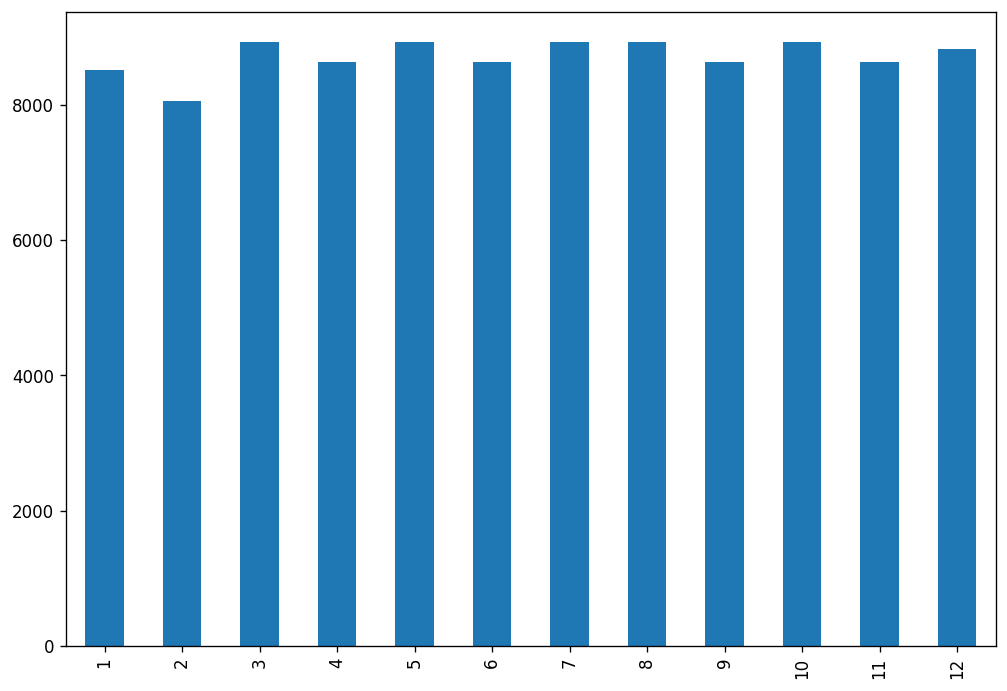

In [42]:
#Line plot of Number of Data points per month
power_data_west_copy['end'].dt.month.value_counts().sort_index().plot(kind='bar')

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='demand'>

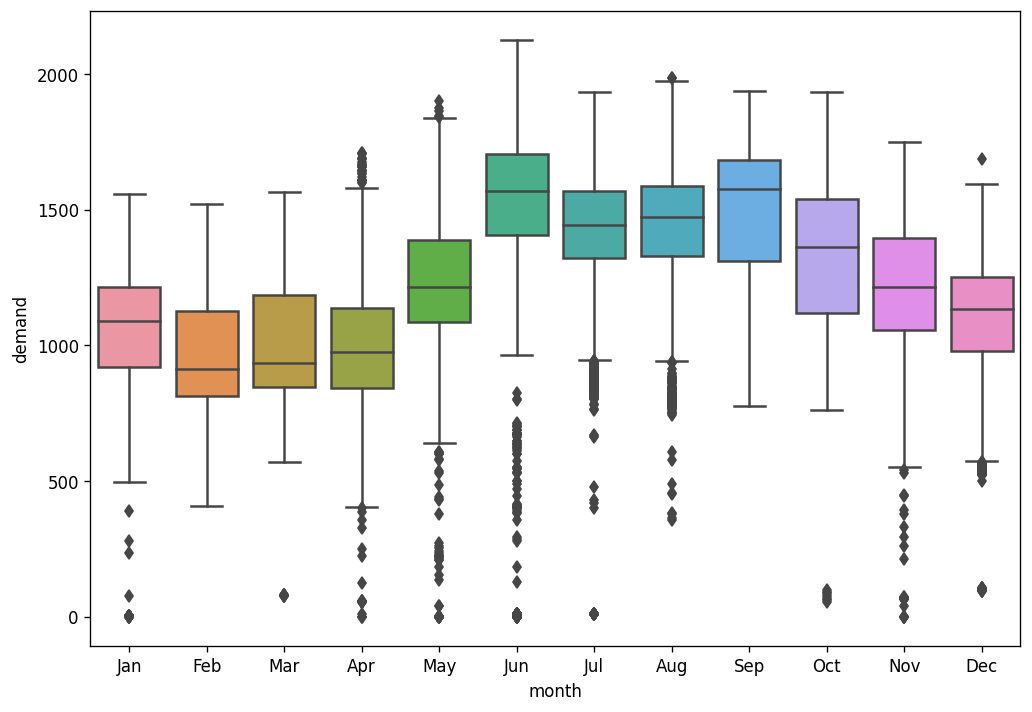

In [43]:
from seaborn import boxplot

boxplot(power_data_west['month'], power_data_west['demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='demand'>

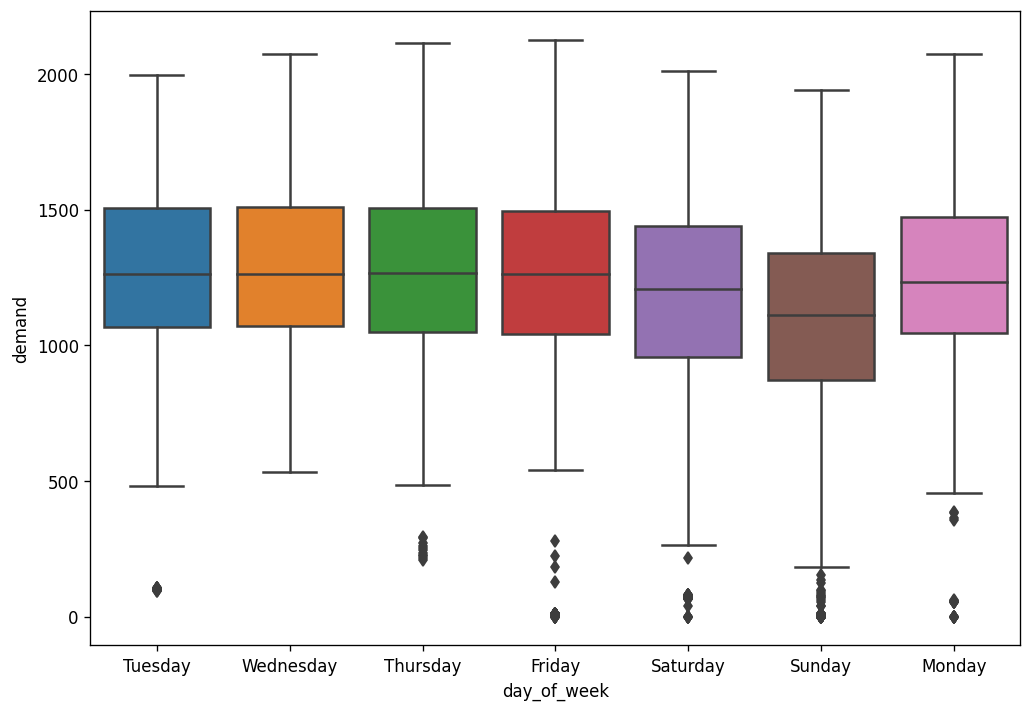

In [45]:
boxplot(power_data_west['day_of_week'], power_data_west['demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='demand'>

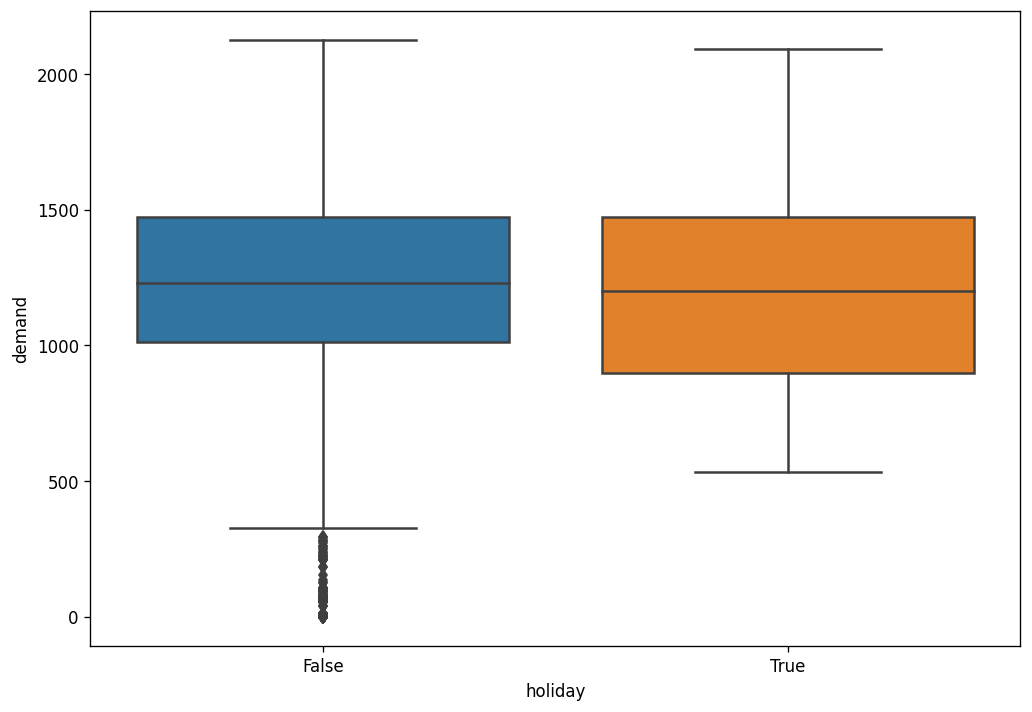

In [46]:
boxplot(power_data_west['holiday'], power_data_west['demand'])

### 2019 Data Analysis

In [29]:
# Seperate data into years and plot
power_data_west_2019 = power_data_west[(power_data_west['End Date Time'] > '2019-01-01') & (power_data_west['End Date Time'] < '2020-01-01')]
power_data_west_2019.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [30]:
power_data_west_2019.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
32341,west,12/31/19 21:15,2019-12-31 21:30:00,208.8,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,835.2,KW,Dec,Tuesday,False
32342,west,12/31/19 21:30,2019-12-31 21:45:00,208.0,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,832.0,KW,Dec,Tuesday,False
32343,west,12/31/19 21:45,2019-12-31 22:00:00,200.0,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,800.0,KW,Dec,Tuesday,False
32344,west,12/31/19 22:00,2019-12-31 22:15:00,189.6,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,758.4,KW,Dec,Tuesday,False
32345,west,12/31/19 22:15,2019-12-31 22:30:00,184.0,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,736.0,KW,Dec,Tuesday,False
32346,west,12/31/19 22:30,2019-12-31 22:45:00,180.0,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,720.0,KW,Dec,Tuesday,False
32347,west,12/31/19 22:45,2019-12-31 23:00:00,171.2,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,684.8,KW,Dec,Tuesday,False
32348,west,12/31/19 23:00,2019-12-31 23:15:00,170.4,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,681.6,KW,Dec,Tuesday,False
32349,west,12/31/19 23:15,2019-12-31 23:30:00,165.6,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,662.4,KW,Dec,Tuesday,False
32350,west,12/31/19 23:30,2019-12-31 23:45:00,165.6,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,662.4,KW,Dec,Tuesday,False


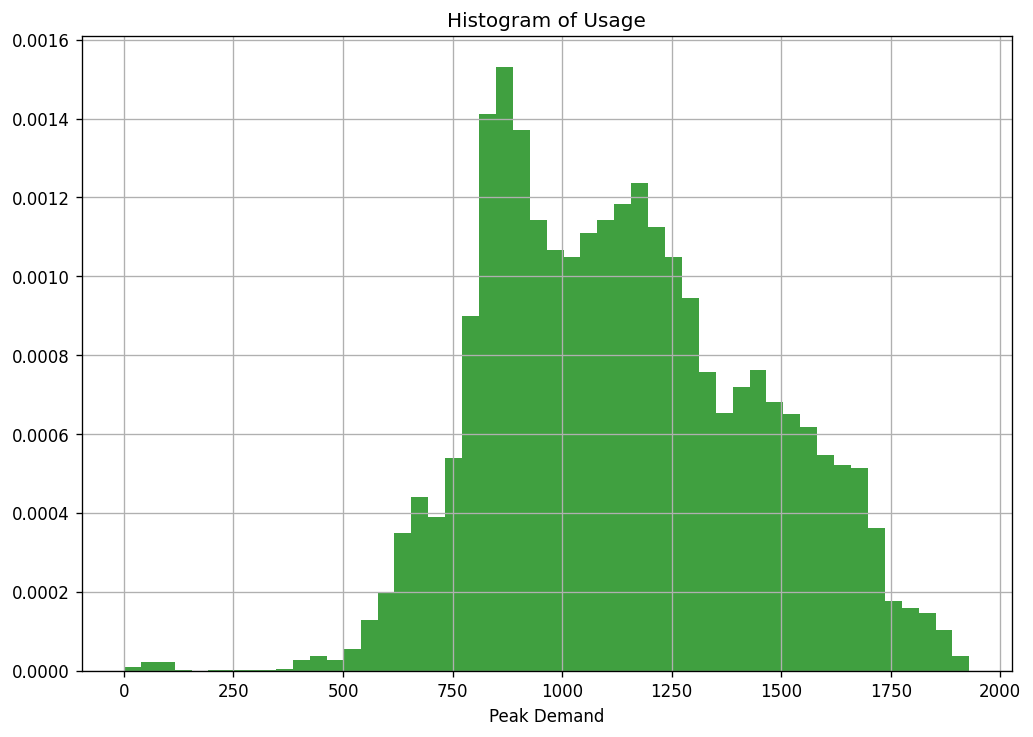

In [31]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_2019['Peak Demand'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Peak Demand')
plt.title('Histogram of Usage')
plt.grid(True)
plt.show()

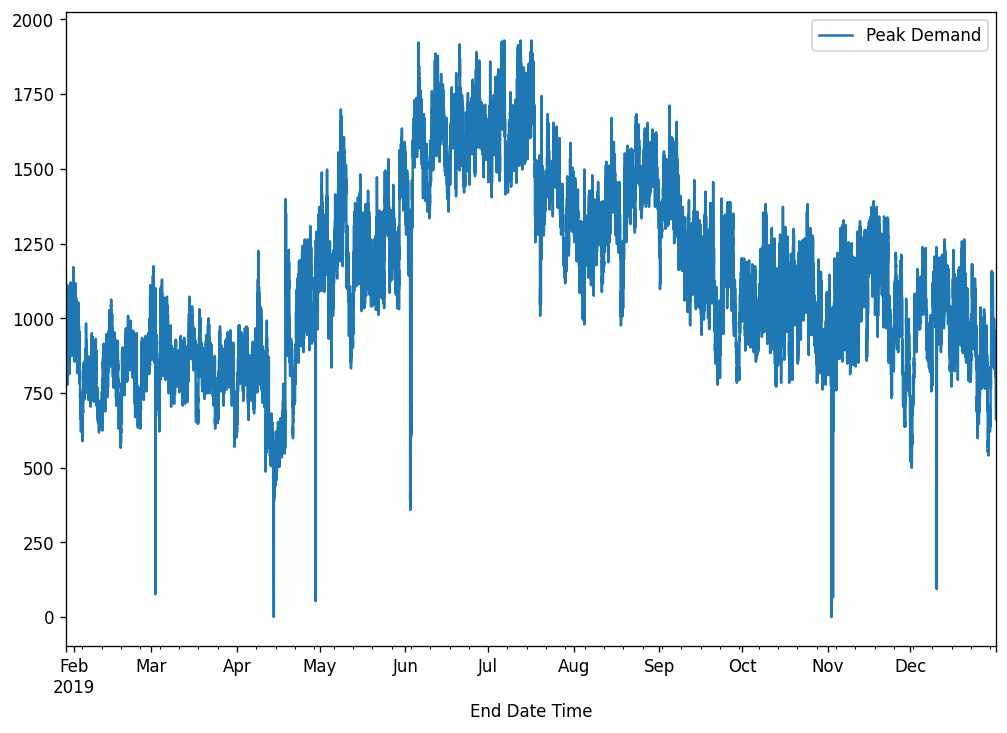

In [33]:
plot_df_west_2019 = pd.DataFrame(power_data_west_2019, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])
plot_df_west_2019.plot(x='End Date Time', y='Peak Demand', kind='line') 
plt.show()

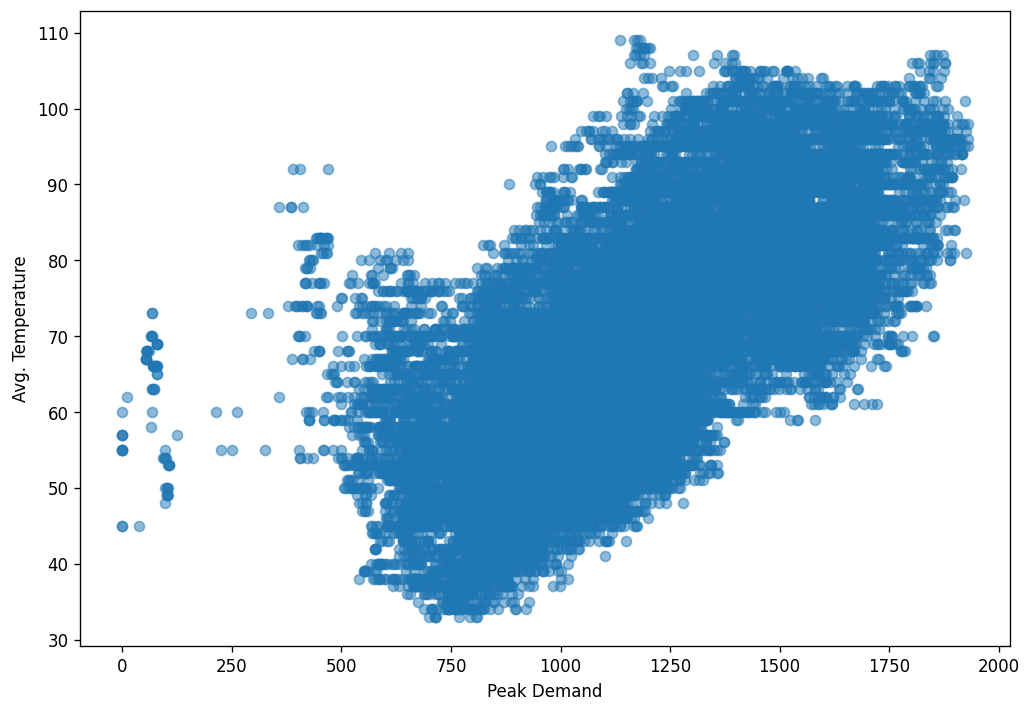

In [34]:
plt.scatter(power_data_west_2019['Peak Demand'], power_data_west_2019['Avg. Temperature'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Avg. Temperature")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Peak Demand'>

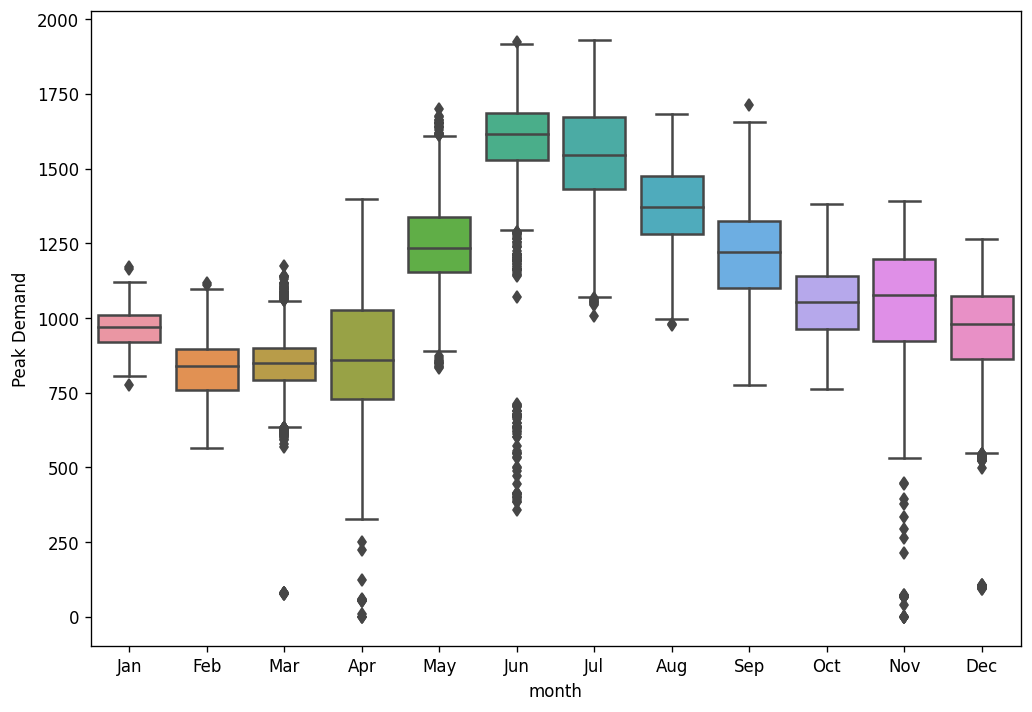

In [35]:
boxplot(power_data_west_2019['month'], power_data_west_2019['Peak Demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='Peak Demand'>

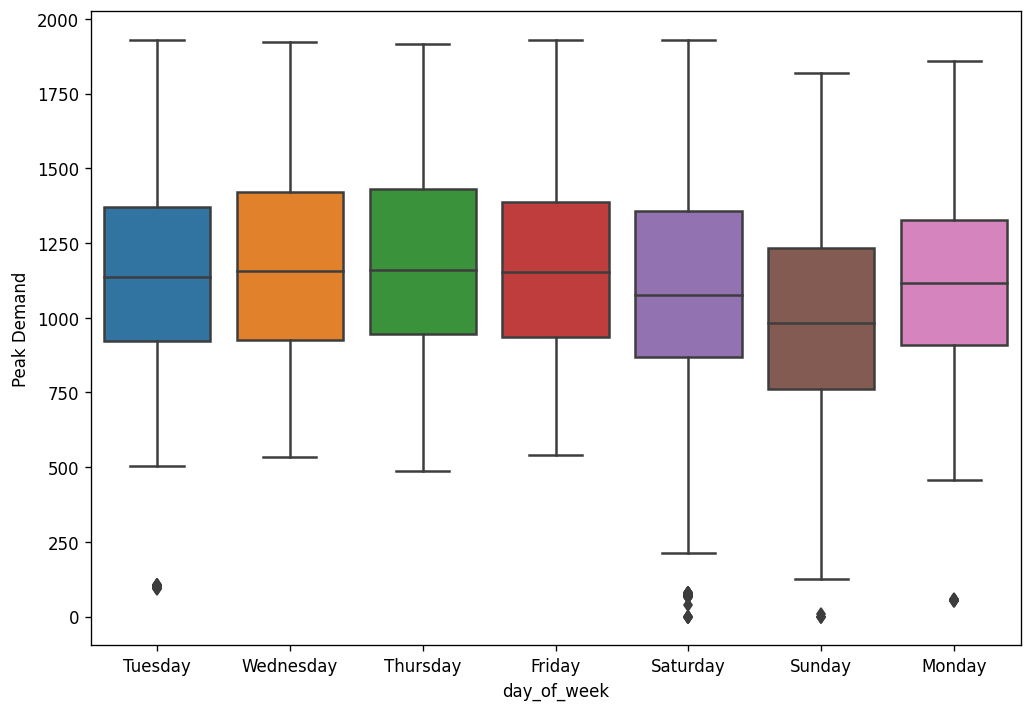

In [36]:
boxplot(power_data_west_2019['day_of_week'], power_data_west_2019['Peak Demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='Peak Demand'>

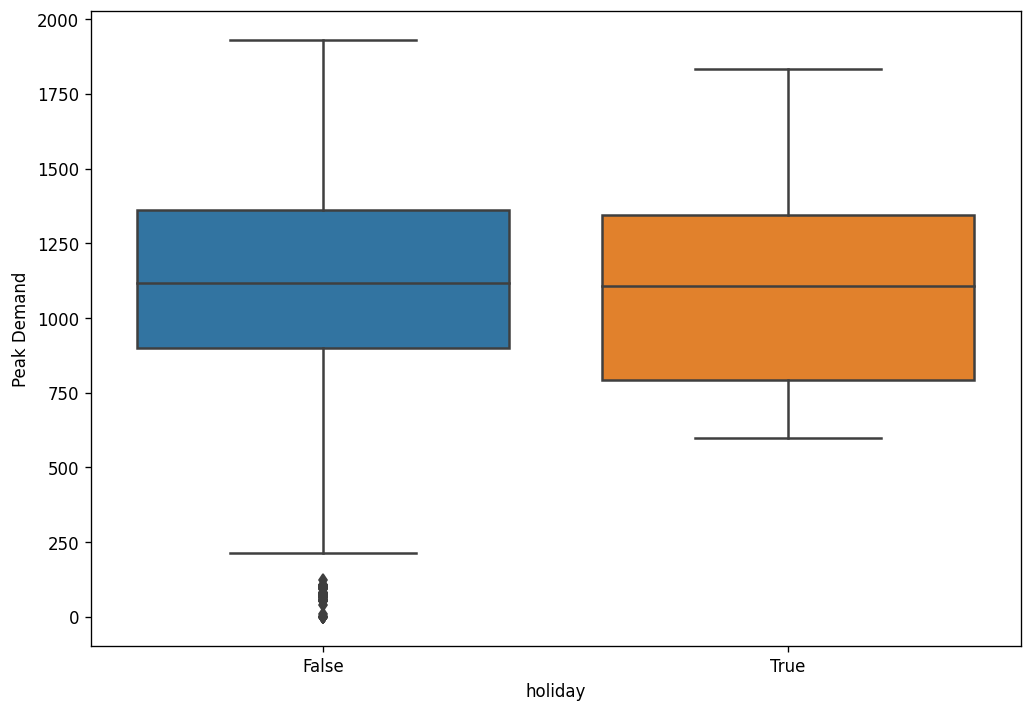

In [37]:
boxplot(power_data_west_2019['holiday'], power_data_west_2019['Peak Demand'])

### 2020 Data Analysis

In [39]:
power_data_west_2020 = power_data_west[(power_data_west['End Date Time'] > '2020-01-01') & (power_data_west['End Date Time'] < '2021-01-01')]
power_data_west_2020.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
32352,west,1/1/20 0:00,2020-01-01 00:15:00,147.2,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,588.8,KW,Jan,Wednesday,True
32353,west,1/1/20 0:15,2020-01-01 00:30:00,142.4,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,569.6,KW,Jan,Wednesday,True
32354,west,1/1/20 0:30,2020-01-01 00:45:00,140.0,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,560.0,KW,Jan,Wednesday,True
32355,west,1/1/20 0:45,2020-01-01 01:00:00,138.4,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,553.6,KW,Jan,Wednesday,True
32356,west,1/1/20 1:00,2020-01-01 01:15:00,136.0,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,544.0,KW,Jan,Wednesday,True
32357,west,1/1/20 1:15,2020-01-01 01:30:00,136.0,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,544.0,KW,Jan,Wednesday,True
32358,west,1/1/20 1:30,2020-01-01 01:45:00,134.4,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,537.6,KW,Jan,Wednesday,True
32359,west,1/1/20 1:45,2020-01-01 02:00:00,134.4,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,537.6,KW,Jan,Wednesday,True
32360,west,1/1/20 2:00,2020-01-01 02:15:00,134.4,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,537.6,KW,Jan,Wednesday,True
32361,west,1/1/20 2:15,2020-01-01 02:30:00,133.6,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,534.4,KW,Jan,Wednesday,True


In [40]:
power_data_west_2020.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
67477,west,12/31/20 21:15,2020-12-31 21:30:00,217.6,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,870.4,KW,Dec,Thursday,False
67478,west,12/31/20 21:30,2020-12-31 21:45:00,213.6,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,854.4,KW,Dec,Thursday,False
67479,west,12/31/20 21:45,2020-12-31 22:00:00,208.0,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,832.0,KW,Dec,Thursday,False
67480,west,12/31/20 22:00,2020-12-31 22:15:00,196.0,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,784.0,KW,Dec,Thursday,False
67481,west,12/31/20 22:15,2020-12-31 22:30:00,202.4,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,809.6,KW,Dec,Thursday,False
67482,west,12/31/20 22:30,2020-12-31 22:45:00,205.6,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,822.4,KW,Dec,Thursday,False
67483,west,12/31/20 22:45,2020-12-31 23:00:00,199.2,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,796.8,KW,Dec,Thursday,False
67484,west,12/31/20 23:00,2020-12-31 23:15:00,197.6,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,790.4,KW,Dec,Thursday,False
67485,west,12/31/20 23:15,2020-12-31 23:30:00,207.2,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,828.8,KW,Dec,Thursday,False
67486,west,12/31/20 23:30,2020-12-31 23:45:00,198.4,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,793.6,KW,Dec,Thursday,False


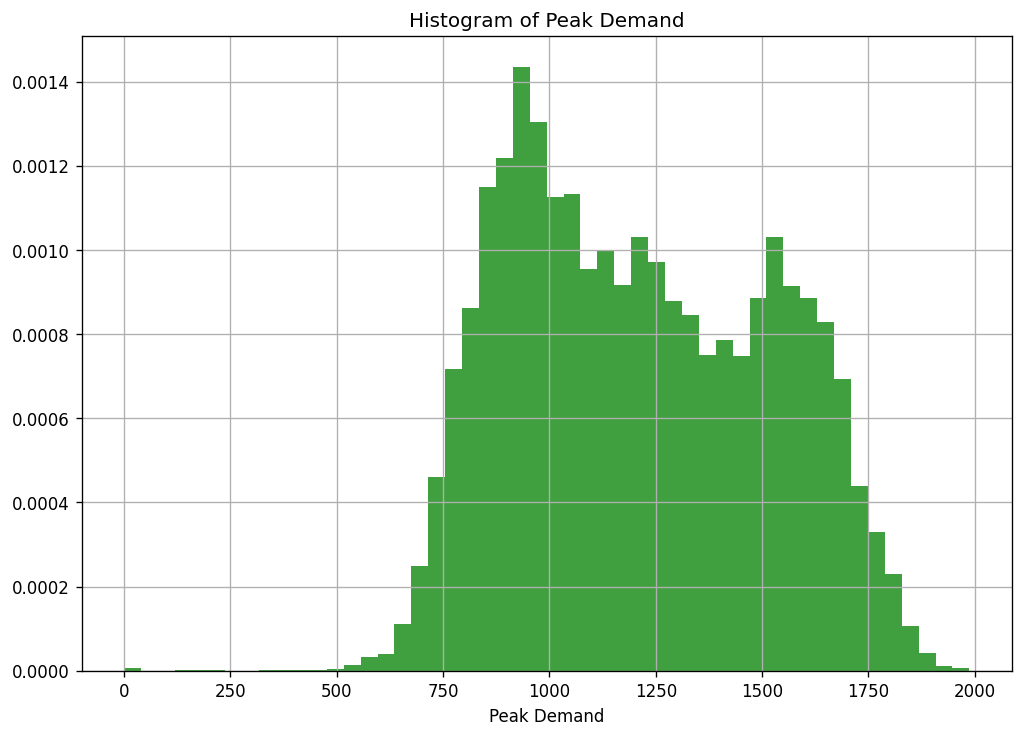

In [44]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_2020['Peak Demand'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Peak Demand')
plt.title('Histogram of Peak Demand')
plt.grid(True)
plt.show()

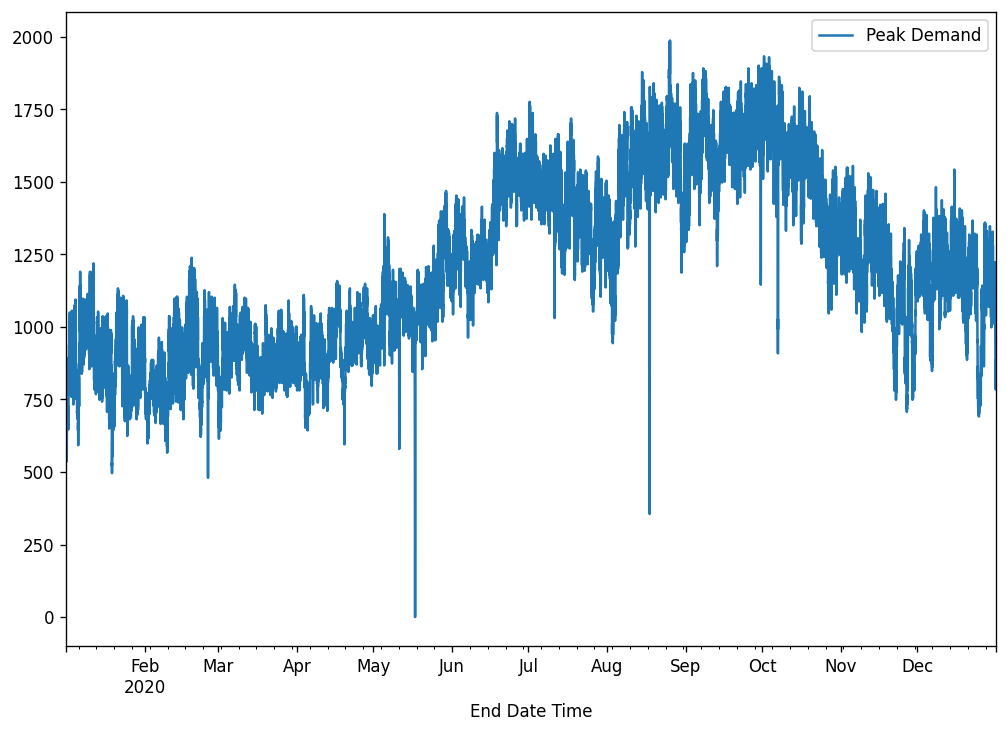

In [45]:
plot_df_west_2020 = pd.DataFrame(power_data_west_2020, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])
plot_df_west_2020.plot(x='End Date Time', y='Peak Demand', kind='line') 
plt.show()

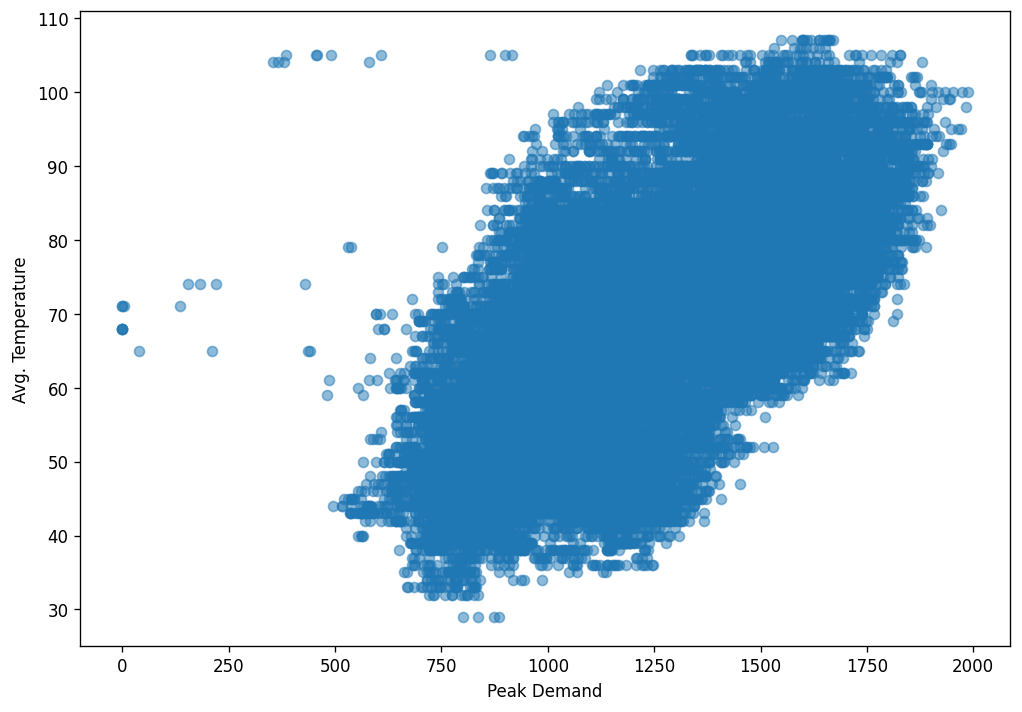

In [46]:
plt.scatter(power_data_west_2020['Peak Demand'], power_data_west_2020['Avg. Temperature'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Avg. Temperature")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Usage'>

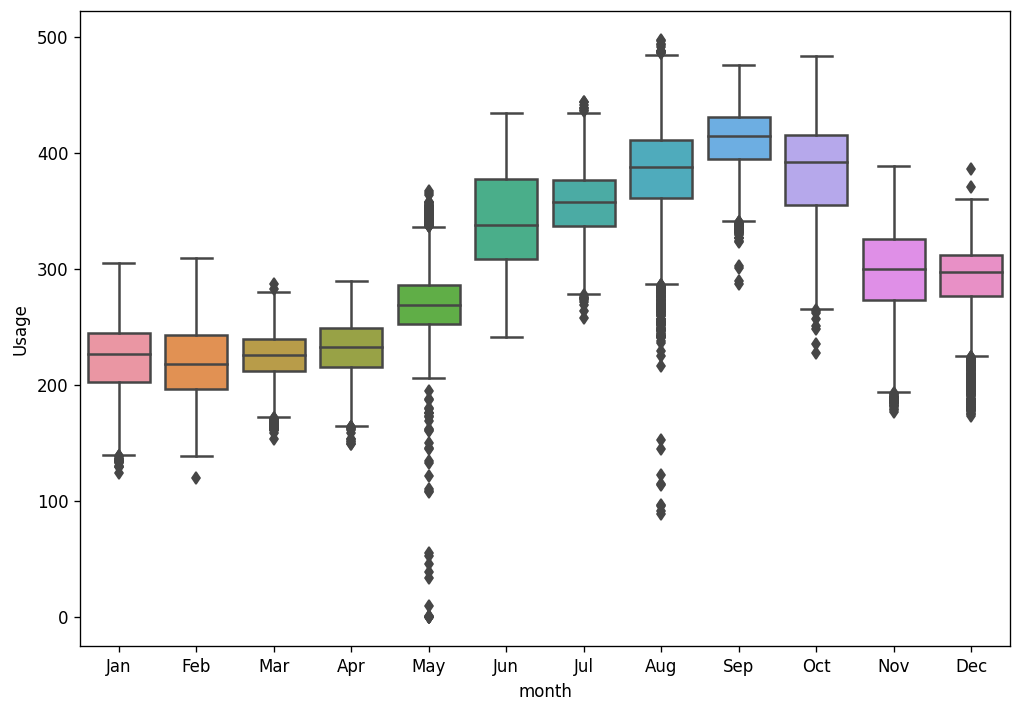

In [47]:
boxplot(power_data_west_2020['month'], power_data_west_2020['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='Peak Demand'>

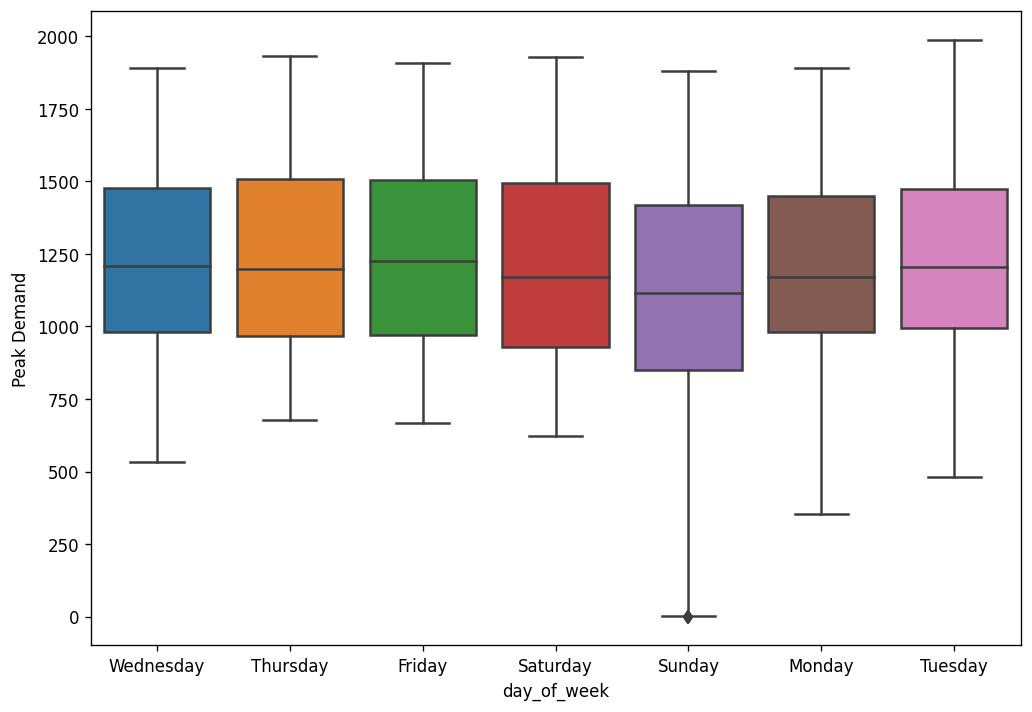

In [48]:
boxplot(power_data_west_2020['day_of_week'], power_data_west_2020['Peak Demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='Peak Demand'>

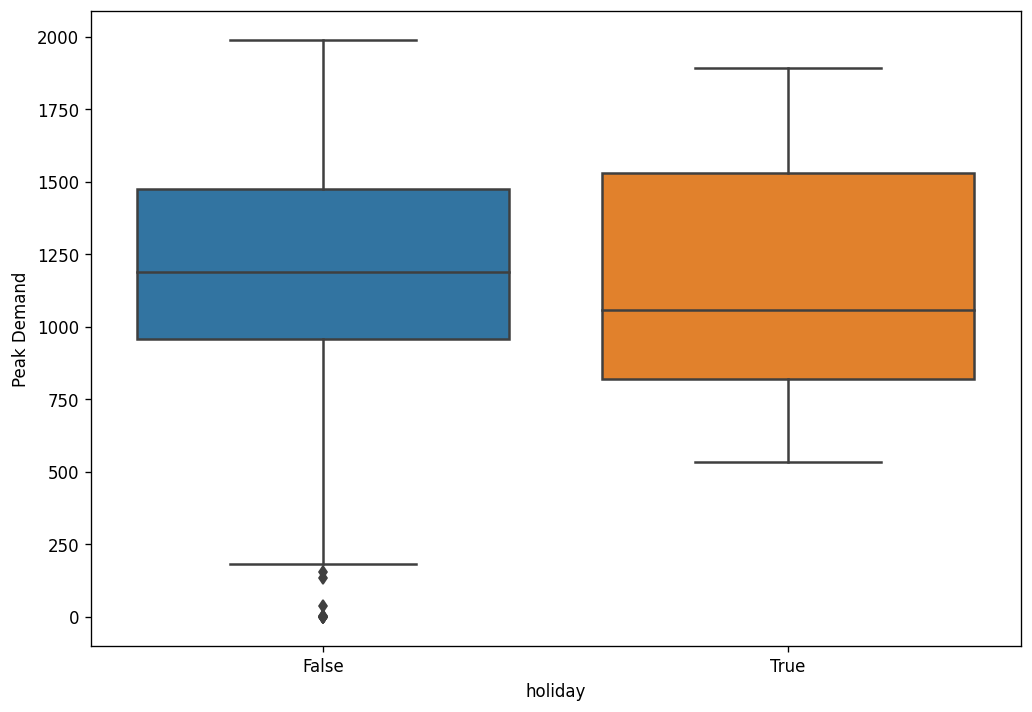

In [49]:
boxplot(power_data_west_2020['holiday'], power_data_west_2020['Peak Demand'])

### 2021 Data Analysis

In [50]:
power_data_west_2021 = power_data_west[(power_data_west['End Date Time'] > '2021-01-01') & (power_data_west['End Date Time'] < '2022-01-01')]

power_data_west_2021.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
67488,west,1/1/21 0:00,2021-01-01 00:15:00,203.2,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,812.8,KW,Jan,Friday,True
67489,west,1/1/21 0:15,2021-01-01 00:30:00,200.0,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,800.0,KW,Jan,Friday,True
67490,west,1/1/21 0:30,2021-01-01 00:45:00,210.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,841.6,KW,Jan,Friday,True
67491,west,1/1/21 0:45,2021-01-01 01:00:00,205.6,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,822.4,KW,Jan,Friday,True
67492,west,1/1/21 1:00,2021-01-01 01:15:00,198.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,793.6,KW,Jan,Friday,True
67493,west,1/1/21 1:15,2021-01-01 01:30:00,207.2,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,828.8,KW,Jan,Friday,True
67494,west,1/1/21 1:30,2021-01-01 01:45:00,204.0,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,816.0,KW,Jan,Friday,True
67495,west,1/1/21 1:45,2021-01-01 02:00:00,198.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,793.6,KW,Jan,Friday,True
67496,west,1/1/21 2:00,2021-01-01 02:15:00,202.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,809.6,KW,Jan,Friday,True
67497,west,1/1/21 2:15,2021-01-01 02:30:00,199.2,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,796.8,KW,Jan,Friday,True


In [51]:
power_data_west_2021.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
102325,west,12/31/21 21:15,2021-12-31 21:30:00,236.8,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,947.2,KW,Dec,Friday,True
102326,west,12/31/21 21:30,2021-12-31 21:45:00,240.8,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,963.2,KW,Dec,Friday,True
102327,west,12/31/21 21:45,2021-12-31 22:00:00,245.6,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,982.4,KW,Dec,Friday,True
102328,west,12/31/21 22:00,2021-12-31 22:15:00,234.4,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,937.6,KW,Dec,Friday,True
102329,west,12/31/21 22:15,2021-12-31 22:30:00,226.4,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,905.6,KW,Dec,Friday,True
102330,west,12/31/21 22:30,2021-12-31 22:45:00,232.8,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,931.2,KW,Dec,Friday,True
102331,west,12/31/21 22:45,2021-12-31 23:00:00,238.4,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,953.6,KW,Dec,Friday,True
102332,west,12/31/21 23:00,2021-12-31 23:15:00,224.0,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,896.0,KW,Dec,Friday,True
102333,west,12/31/21 23:15,2021-12-31 23:30:00,217.6,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,870.4,KW,Dec,Friday,True
102334,west,12/31/21 23:30,2021-12-31 23:45:00,223.2,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,892.8,KW,Dec,Friday,True


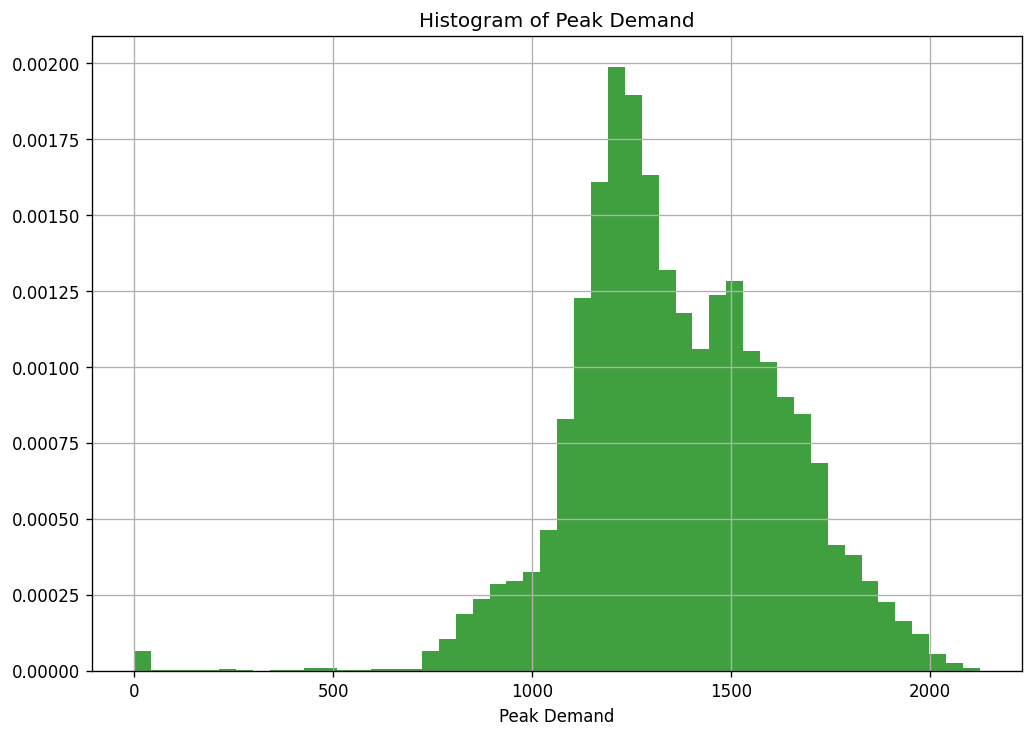

In [52]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_2021['Peak Demand'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Peak Demand')
plt.title('Histogram of Peak Demand')
plt.grid(True)
plt.show()

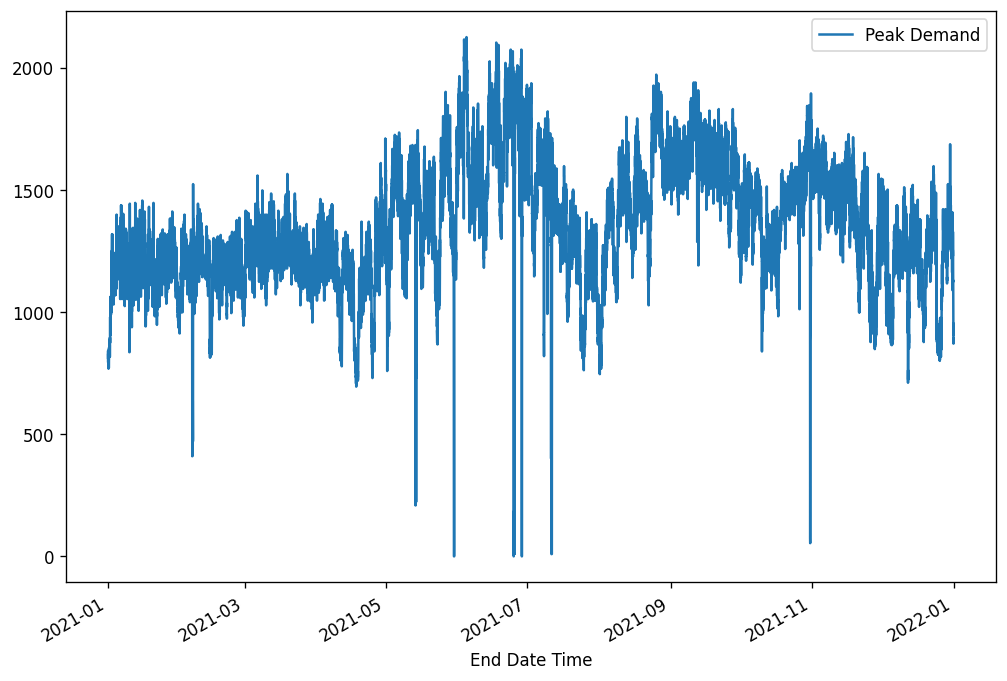

In [53]:
plot_df_west_2021 = pd.DataFrame(power_data_west_2021, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])
plot_df_west_2021.plot(x='End Date Time', y='Peak Demand', kind='line') 
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Peak Demand'>

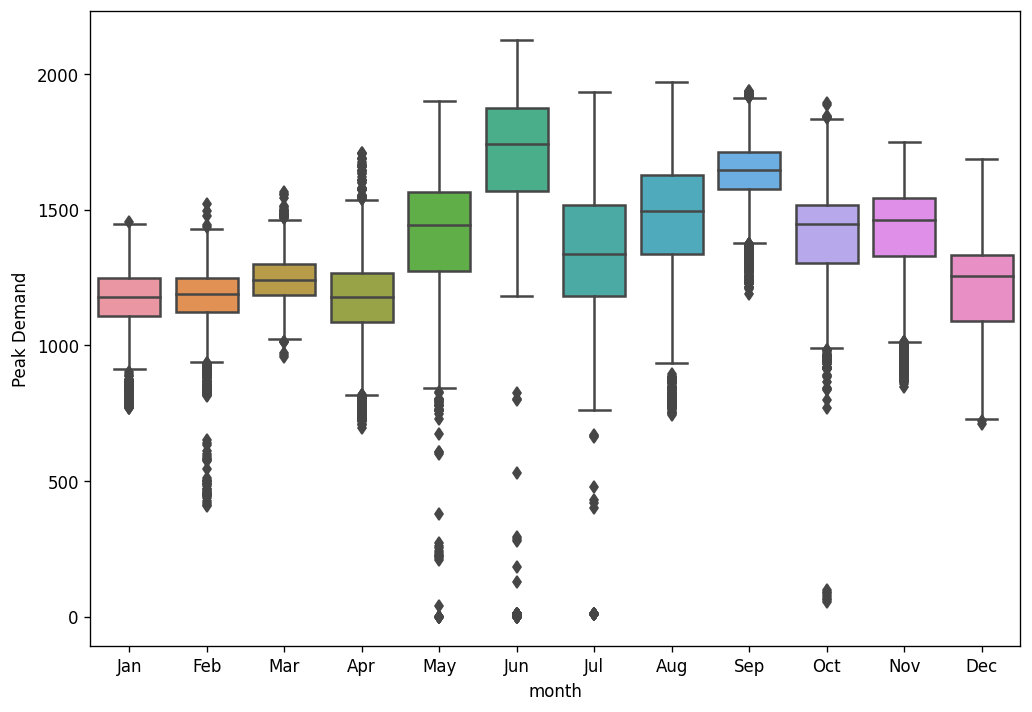

In [54]:
boxplot(power_data_west_2021['month'], power_data_west_2021['Peak Demand'])

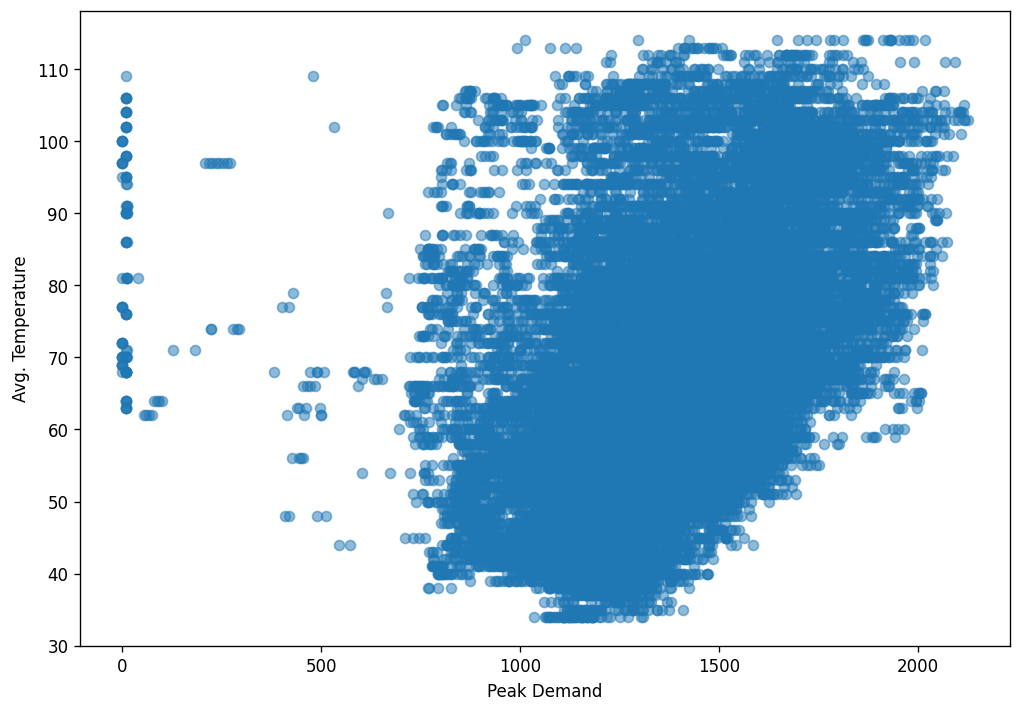

In [55]:
plt.scatter(power_data_west_2021['Peak Demand'], power_data_west_2021['Avg. Temperature'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Avg. Temperature")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='Peak Demand'>

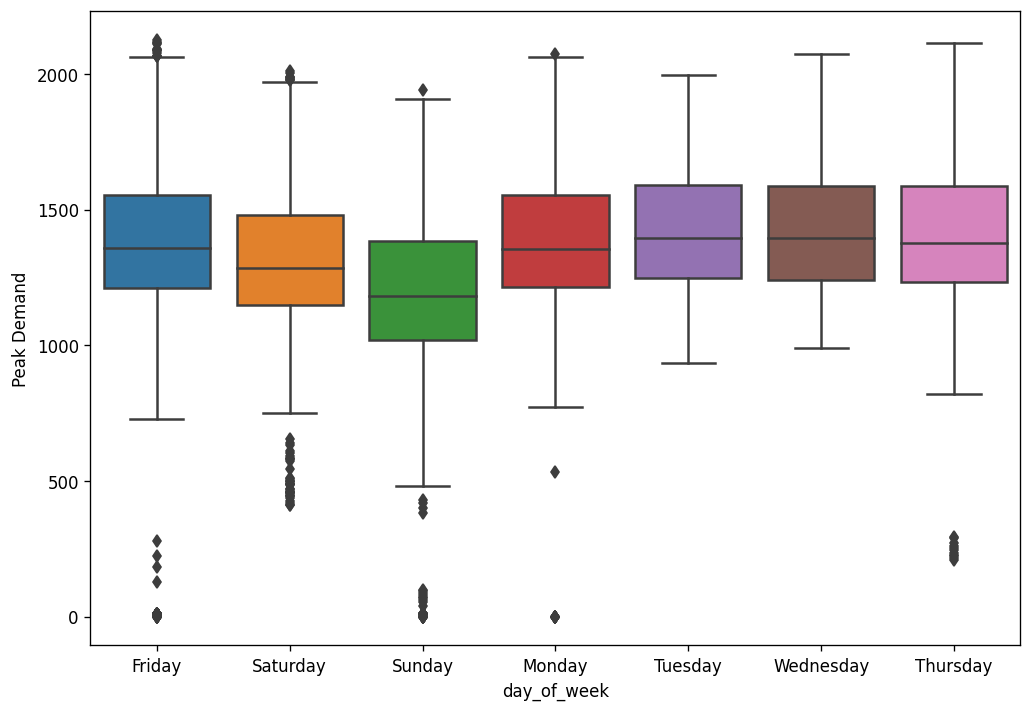

In [56]:
boxplot(power_data_west_2021['day_of_week'], power_data_west_2021['Peak Demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='Peak Demand'>

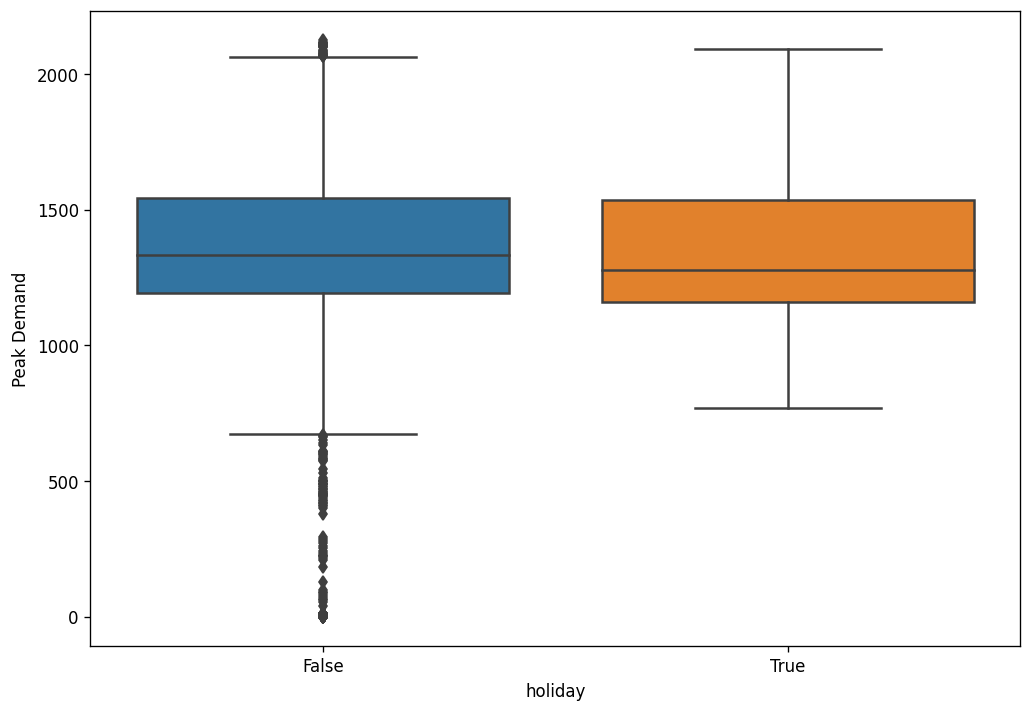

In [58]:
boxplot(power_data_west_2021['holiday'], power_data_west_2021['Peak Demand'])